In [1]:
from model import *
from data import *
from custom_callbacks import ValidatePredictions
import cv2
import random
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import time



'''

    Important Model Variables
    
'''
weights_path     ='weights/'
weights_name     = "Unet_{epoch}_{dice_coef}_{loss}.h5"
batch_size       = 4
tensorboard_logs = "logs/"

'''

    Making Directories

'''

os.system(f"mkdir -p {weights_path}")
os.system(f"mkdir -p {tensorboard_logs}")

0

### Train with data generator

Found 10488 images belonging to 1 classes.
Found 10488 images belonging to 1 classes.


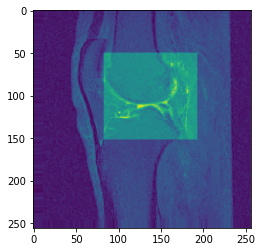

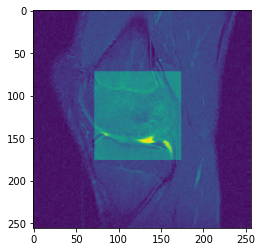

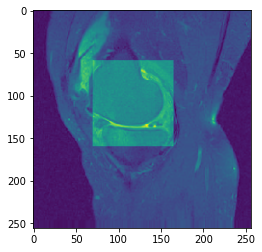

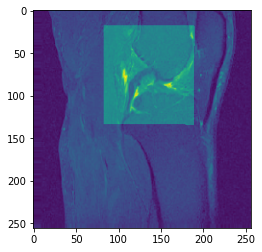

/home/sohaib/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [2]:

'''
    Data Generator
    
'''

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_generator = trainGenerator(batch_size,'/media/sohaib/additional_/DataScience/knee_mri/dataset/unet_format/train/','images','masks',data_gen_args,save_to_dir = None)
val_generator = trainGenerator(batch_size,'/media/sohaib/additional_/DataScience/knee_mri/dataset/unet_format/train/','images','masks',data_gen_args,save_to_dir = None)


'''

    Validate your Images

'''

image, label = next(train_generator)
for i in range(0,batch_size):
    added_image = cv2.addWeighted(image[i].squeeze(),0.4,label[i].squeeze(),0.1,0)
    plt.imshow(added_image)
    plt.show()


model = unet()

In [ ]:

model.fit_generator(
    train_generator,
    steps_per_epoch = 200,
    epochs = 1000,
    callbacks = [
                 ModelCheckpoint(weights_path + weights_name,save_best_only=True,save_weights_only=True), 
                 TensorBoard(log_dir="./logs"),
                 ValidatePredictions(model, val_generator)
                 

    ],
     validation_data= val_generator,
    validation_steps= 100,
#     verbose =2 
)


Found 10488 images belonging to 1 classes.
Found 10488 images belonging to 1 classes.


/home/sohaib/anaconda3/envs/tensorflow2/lib/python3.7/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000


### Train with npy file